In [3]:
import pandas as pd

# Define the dataset
data = {
    "CustomerID": ["7590-VHVEG", "5575-GNVDE", "3668-QPYBK", "7795-CFOCW", "9237-HQITU",
                   "9305-CDSKC", "1452-KIOVK", "6713-YVIPN", "7892-POOKP", "6388-TABGU"],
    "Gender": ["Female", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Male"],
    "SeniorCitizen": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    "Partner": ["Yes", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes"],
    "Dependents": ["No", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes"],
    "Tenure": [1, 34, 2, 45, 2, 8, 22, 10, 28, 62],
    "MonthlyCharges": [29.85, 56.95, 53.85, 42.30, 70.70, 99.65, 89.10, 29.75, 59.30, 59.80],
    "TotalCharges": [29.85, 1889.50, 108.15, 1840.75, 151.65, 820.50, 1949.40, 301.95, 1625.20, 3700.30],
    "Contract": ["Month-to-month", "One year", "Month-to-month", "Two year", "Month-to-month",
                 "One year", "Two year", "Month-to-month", "One year", "Two year"],
    "PaymentMethod": ["Electronic check", "Mailed check", "Mailed check", "Bank transfer (automatic)",
                      "Electronic check", "Credit card (automatic)", "Bank transfer (automatic)",
                      "Electronic check", "Credit card (automatic)", "Mailed check"],
    "Churn": ["Yes", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("Telco-Customer-Churn.csv", index=False)
df



,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,Churn
0,7590-VHVEG,Female,0,Yes,No,1,29.85,29.85,Month-to-month,Electronic check,Yes
1,5575-GNVDE,Male,0,No,No,34,56.95,1889.50,One year,Mailed check,No
2,3668-QPYBK,Male,0,No,No,2,53.85,108.15,Month-to-month,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,45,42.30,1840.75,Two year,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,2,70.70,151.65,Month-to-month,Electronic check,Yes
5,9305-CDSKC,Female,0,No,No,8,99.65,820.50,One year,Credit card (automatic),No
6,1452-KIOVK,Male,0,Yes,No,22,89.10,1949.40,Two year,Bank transfer (automatic),No
7,6713-YVIPN,Female,1,Yes,Yes,10,29.75,301.95,Month-to-month,Electronic check,Yes
8,7892-POOKP,Female,0,No,No,28,59.30,1625.20,One year,Credit card (automatic),No
9,6388-TABGU,Male,0,Yes,Yes,62,59.80,3700.30,Two year,Mailed check,No


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Step 2: Explore the dataset
print("Dataset Head:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Head:
   CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure  \
0  7590-VHVEG  Female              0     Yes         No       1   
1  5575-GNVDE    Male              0      No         No      34   
2  3668-QPYBK    Male              0      No         No       2   
3  7795-CFOCW    Male              0      No         No      45   
4  9237-HQITU  Female              0      No         No       2   

   MonthlyCharges  TotalCharges        Contract              PaymentMethod  \
0           29.85         29.85  Month-to-month           Electronic check   
1           56.95       1889.50        One year               Mailed check   
2           53.85        108.15  Month-to-month               Mailed check   
3           42.30       1840.75        Two year  Bank transfer (automatic)   
4           70.70        151.65  Month-to-month           Electronic check   

  Churn  
0   Yes  
1    No  
2   Yes  
3    No  
4   Yes  

Missing Values:
CustomerID        0
Gender           

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with the median
if df['TotalCharges'].isnull().sum() > 0:
    print("\nFilling missing values in 'TotalCharges' column...\n")
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Verify no missing values remain
print("Missing values after handling:")
print(df.isnull().sum())

# Step 4: Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Partner', 'Dependents', 'Contract', 'PaymentMethod', 'Churn']

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\nEncoded categorical variables.")

Missing values after handling:
CustomerID        0
Gender            0
SeniorCitizen     0
Partner           0
Dependents        0
Tenure            0
MonthlyCharges    0
TotalCharges      0
Contract          0
PaymentMethod     0
Churn             0
dtype: int64

Encoded categorical variables.


C:\Users\Sai Deepthi\AppData\Local\Temp\ipykernel_50884\3268735171.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X[['Tenure', 'MonthlyCharges', 'TotalCharges']])



Features scaled.

Data split into training and testing sets.

Random Forest model trained.

Predictions made.

Confusion Matrix:
[[2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Model Accuracy: 100.00%


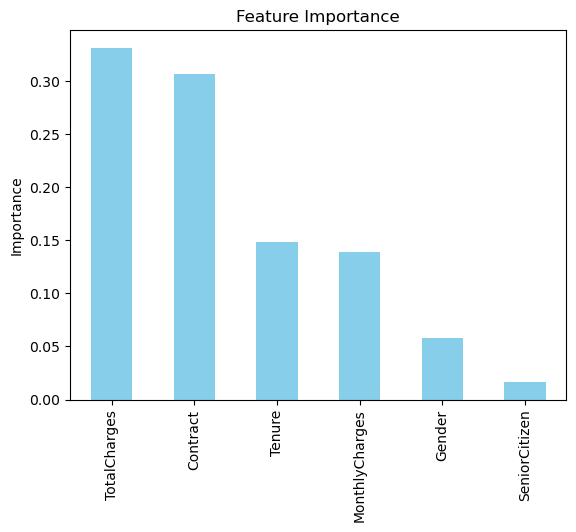

In [20]:
features = ['Gender', 'SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract']
X = df[features]
y = df['Churn']

# Step 6: Scale numerical features
scaler = StandardScaler()
X[['Tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X[['Tenure', 'MonthlyCharges', 'TotalCharges']])

print("\nFeatures scaled.")

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets.")

# Step 8: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\nRandom Forest model trained.")

# Step 9: Make predictions
y_pred = model.predict(X_test)
print("\nPredictions made.")

# Step 10: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Step 11: Visualize Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance', color='skyblue')
plt.ylabel("Importance")
plt.show()
